# IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import *
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy import sparse
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
import sys
sys.path.append("../")
from helper_functions import *

# LOADING DATA

In [3]:
x_train = np.load("Data/xtrain.npy")
y_test = np.load("Data/ytest.npy")
x_test = np.load("Data/xtest.npy")
y_train = np.load("Data/ytrain.npy")

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6299, 768), (6299,), (1575, 768), (1575,))

In [5]:
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
x.shape, y.shape

((7874, 768), (7874,))

# MODELLING

## Initializing

In [6]:
lreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
gboost = GradientBoostingClassifier()
hist = HistGradientBoostingClassifier()
ada = AdaBoostClassifier()
forest = RandomForestClassifier()
cat = CatBoostClassifier()
light = LGBMClassifier()
xgb = XGBClassifier()

In [7]:
models = {
  'Logistic Regression': lreg,
  'Decision Tree': tree,
  'KNN': knn,     
  'SVC': svc,
  'AdaBoost': ada,
  'Gradient Boosting': gboost,
  'Random Forest': forest,
  'XGBoost': xgb,
  'CatBoost': cat,
  'LightGBM': light
}

In [8]:
training_models = Train_Classifiers(x, y, models)

In [9]:
training_models.fit()

Training Logistic Regression
Logistic Regression Model Trained
------------------
Training Decision Tree
Decision Tree Model Trained
------------------
Training KNN
KNN Model Trained
------------------
Training SVC
SVC Model Trained
------------------
Training AdaBoost
AdaBoost Model Trained
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
------------------
Training Random Forest
Random Forest Model Trained
------------------
Training XGBoost
XGBoost Model Trained
------------------
Training CatBoost
Learning rate set to 0.086913
0:	learn: 2.2757991	total: 448ms	remaining: 7m 27s
1:	learn: 2.1922614	total: 826ms	remaining: 6m 52s
2:	learn: 2.1198402	total: 1.19s	remaining: 6m 36s
3:	learn: 2.0439970	total: 1.58s	remaining: 6m 32s
4:	learn: 1.9893579	total: 1.98s	remaining: 6m 33s
5:	learn: 1.9388647	total: 2.35s	remaining: 6m 29s
6:	learn: 1.8929822	total: 2.72s	remaining: 6m 26s
7:	learn: 1.8456150	total: 3.09s	remaining: 6m 23s
8:	learn: 1.8049107	total:

In [10]:
training_models.score()

Training Logistic Regression
Logistic Regression: 0.6755555555555556
Training Decision Tree
Decision Tree: 0.4177777777777778
Training KNN
KNN: 0.5873015873015873
Training SVC
SVC: 0.653968253968254
Training AdaBoost
AdaBoost: 0.48698412698412696
Training Gradient Boosting
Gradient Boosting: 0.6374603174603175
Training Random Forest
Random Forest: 0.6190476190476191
Training XGBoost
XGBoost: 0.6419047619047619
Training CatBoost
CatBoost: 0.6692063492063492
Training LightGBM
LightGBM: 0.6342857142857142


In [11]:
results = training_models.Compare_Performance()

In [13]:
results

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,Logistic Regression,0.676,0.614,0.661,0.532,0.483,0.765,0.739,0.534,0.739,...,0.667,0.511,0.444,0.760,0.697,0.530,0.756,0.711,0.471,0.902
1,Decision Tree,0.418,0.362,0.327,0.261,0.169,0.439,0.468,0.153,0.538,...,0.332,0.262,0.165,0.435,0.407,0.168,0.529,0.515,0.270,0.753
2,KNN,0.587,0.492,0.589,0.384,0.302,0.637,0.776,0.378,0.661,...,0.603,0.424,0.368,0.650,0.659,0.292,0.638,0.645,0.311,0.907
3,SVC,0.654,0.574,0.640,0.488,0.426,0.717,0.727,0.824,0.710,...,0.651,0.502,0.348,0.732,0.713,0.368,0.728,0.694,0.420,0.909
4,AdaBoost,0.487,0.414,0.409,0.381,0.220,0.442,0.495,0.312,0.532,...,0.380,0.405,0.186,0.493,0.485,0.133,0.590,0.504,0.276,0.883
5,Gradient Boosting,0.637,0.587,0.621,0.450,0.446,0.701,0.756,0.426,0.715,...,0.610,0.432,0.403,0.686,0.705,0.377,0.746,0.675,0.439,0.906
6,Random Forest,0.619,0.567,0.624,0.449,0.469,0.607,0.707,1.000,0.686,...,0.606,0.484,0.300,0.676,0.667,0.156,0.683,0.669,0.362,0.909
7,XGBoost,0.642,0.581,0.612,0.510,0.418,0.720,0.677,0.487,0.677,...,0.600,0.468,0.374,0.739,0.653,0.388,0.696,0.715,0.430,0.908
8,CatBoost,0.669,0.593,0.648,0.521,0.545,0.741,0.747,0.600,0.729,...,0.651,0.527,0.429,0.737,0.717,0.485,0.746,0.706,0.457,0.909
9,LightGBM,0.634,0.572,0.646,0.487,0.471,0.672,0.765,0.600,0.681,...,0.611,0.481,0.314,0.700,0.691,0.357,0.715,0.675,0.403,0.916


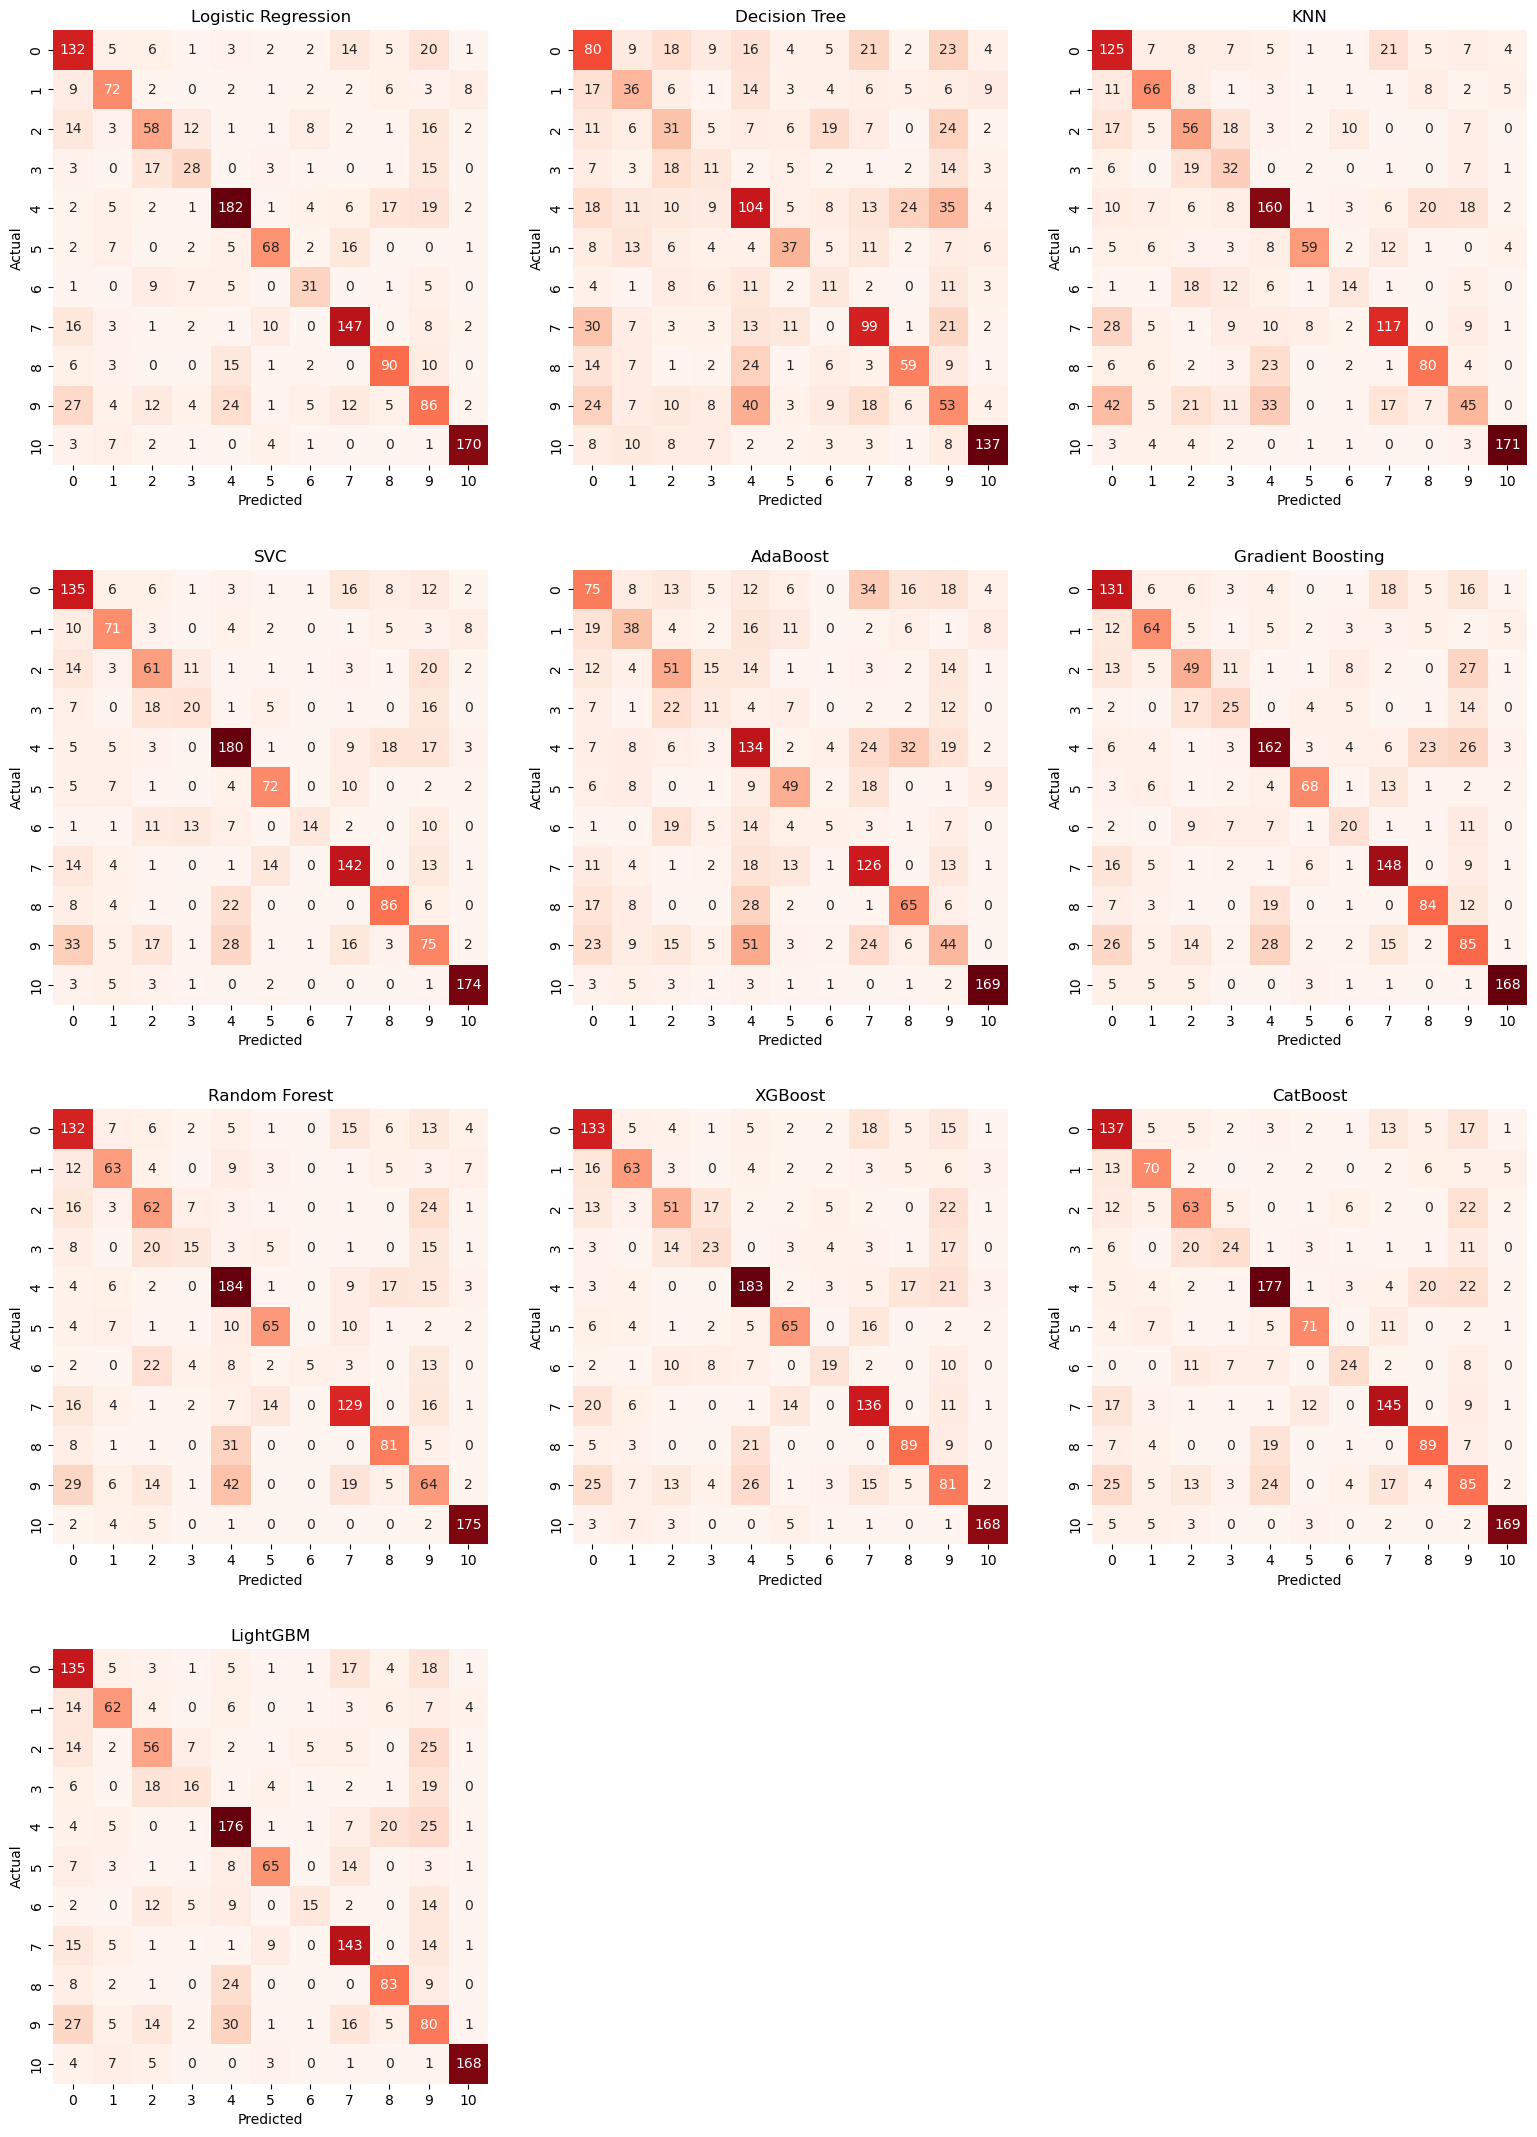

In [12]:
training_models.Compare_ConfusionMatrices()

In [15]:
trained_models= training_models.get_trained_models()
for key, model in trained_models.items():
    joblib.dump(model, f"Models/Initial/{key}.pk1")

In [19]:
del models['Decision Tree']
del models['KNN']
del models['AdaBoost']
del models['Gradient Boosting']

In [20]:
models

{'Logistic Regression': LogisticRegression(),
 'SVC': SVC(),
 'Random Forest': RandomForestClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='multi:softprob', predictor=None, ...),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x7f853443d9f0>,
 'LightGBM': LGBMClassifier()}

In [ ]:
BestParam_search(models,x,y)